# Task 1
### a) Gamma distribution
Below code shows stan file that generates gamma distributed numbers with given parameters (alpha and beta). Then stan file is being compiled to C++ code for further use.

In [1]:
import stan_utility


with open('gamma.stan', 'r') as file:
    print(file.read())

data {
    real alpha;
    real beta;
}

generated quantities {
    real y = gamma_rng (alpha, beta);
}


In [2]:
gamma_model = stan_utility.compile_model('gamma.stan')

Using cached StanModel


Below code uses compiled stan model and then plots histogram for gamma distribution (alpha = 4, beta = 2).

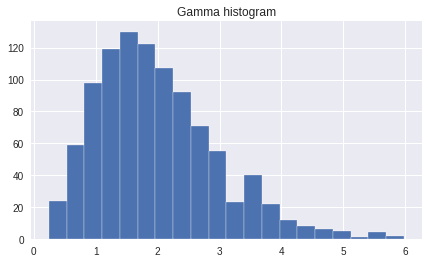

In [3]:
iters=1000
data=dict(alpha=4, beta=2)
sim = gamma_model.sampling(data=data, algorithm="Fixed_param", iter=iters, warmup=0, chains=1)

y = sim.extract()['y']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')

fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1 = axes
ax1.hist(y,bins=20, edgecolor='white')
ax1.set_title('Gamma histogram')
plt.show()

### b) Inverse Gamma distribution
Below code shows stan file that generates inverse gamma distributed numbers with given parameters (alpha and beta). Then stan file is being compiled to C++ code for further use.

In [4]:
with open('inv_gamma.stan', 'r') as file:
    print(file.read())

data {
    real alpha;
    real beta;
}

generated quantities {
    real y = inv_gamma_rng (alpha, beta);
}


In [5]:
inv_gamma_model = stan_utility.compile_model('inv_gamma.stan')

Using cached StanModel


Below code uses compiled stan model and then plots histogram for inverse gamma distribution (alpha = 4, beta = 2).

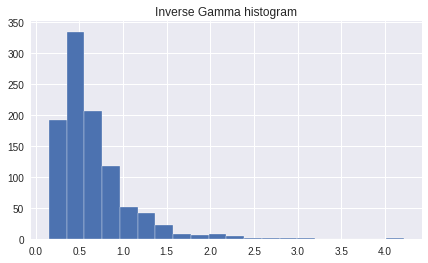

In [6]:
iters=1000
data=dict(alpha=4, beta=2)
sim = inv_gamma_model.sampling(data=data, algorithm="Fixed_param", iter=iters, warmup=0, chains=1)

y = sim.extract()['y']

fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1 = axes
ax1.hist(y, bins=20, edgecolor='white')
ax1.set_title('Inverse Gamma histogram')
plt.show()

### c) Parameters for Gamma for which 98% probability is for values between 5 and 10
Below stan code shows steps for finding alpha and beta parameters of gamma distribution.

In [7]:
with open('gamma_fit.stan', 'r') as file:
    print(file.read())

functions {
  vector gamma_fun(vector y, vector theta, real[] x_r, int[] x_i) {
    vector[2] deltas;
    
    deltas[1] = gamma_cdf(theta[1], y[1], y[2]);
    deltas[2] = gamma_cdf(theta[2], y[1], y[2]) - 0.98;
    
    return deltas;
  }
}

data {
  vector[3] params;
  vector[2] theta;     
  vector[2] y_guess;
}

transformed data {
  vector[2] y;
  real x_r[0];
  int x_i[0];
  
  y = algebra_solver(gamma_fun, y_guess, theta, x_r, x_i, params[1], params[2], params[3]);
}

generated quantities {
    real gamma = gamma_rng(y[1],y[2]);
    real alpha = y[1];
    real beta = y[2];
}


In [8]:
model = stan_utility.compile_model('gamma_fit.stan')

Using cached StanModel


In [9]:
iters = 1000
theta = [5, 10]
y_guess = [10.5, 1.1]
params = [1e-10, 1e-3, 1e10]
data = dict(theta=theta, y_guess=y_guess, params=params)
sim = model.sampling(data=data,
                     algorithm="Fixed_param", 
                     iter=iters, 
                     warmup=0, 
                     chains=1)
result = sim.extract()
gamma = result['gamma']
alpha = result['alpha'][0]
beta = result['beta'][0]
print("alpha = ", alpha)
print("beta = ", beta)

alpha =  62.96880151297496
beta =  8.033632207993875


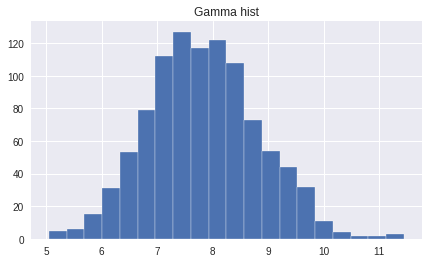

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1 = axes
ax1.hist(gamma, bins=20, edgecolor='white')
ax1.set_title('Gamma hist')

plt.show()

Most of the values (98%) are between 5 and 10.

### d) Parameters for Inverse Gamma for which 98% probability is for values between 5 and 10
Below stan code shows steps for finding alpha and beta parameters of inverse gamma distribution.

In [11]:
with open('inv_gamma_fit.stan', 'r') as file:
    print(file.read())

functions {
  vector inv_gamma_fun(vector y, vector theta, real[] x_r, int[] x_i) {
    vector[2] deltas;
    
    deltas[1] = inv_gamma_cdf(theta[1], y[1], y[2]);
    deltas[2] = inv_gamma_cdf(theta[2], y[1], y[2]) - 0.98;
    
    return deltas;
  }
}

data {
  vector[3] params;
  vector[2] theta;     
  vector[2] y_guess;
}

transformed data {
  vector[2] y;
  real x_r[0];
  int x_i[0];
  
  y = algebra_solver(inv_gamma_fun, y_guess, theta, x_r, x_i, params[1], params[2], params[3]);
}

generated quantities {
    real inv_gamma = inv_gamma_rng(y[1],y[2]);
    real alpha = y[1];
    real beta = y[2];
}


In [12]:
model = stan_utility.compile_model('inv_gamma_fit.stan')

Using cached StanModel


In [13]:
iters = 1000
theta = [5, 10]
y_guess = [1.1, 10.5]
params = [1e-10, 1e-6, 1e10]
data = dict(theta=theta, y_guess=y_guess, params=params)
sim = model.sampling(data=data,
                     algorithm="Fixed_param", 
                     iter=iters, 
                     warmup=0, 
                     chains=1)
result = sim.extract()
inv_gamma = result['inv_gamma']
alpha = result['alpha'][0]
beta = result['beta'][0]
print("alpha = ", alpha)
print("beta = ", beta)

alpha =  114.51295844013106
beta =  936.223447511272


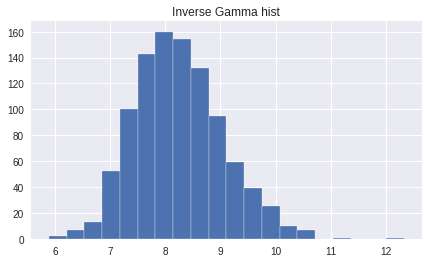

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1 = axes
ax1.hist(inv_gamma, bins=20, edgecolor='white')
ax1.set_title('Inverse Gamma hist')

plt.show()

Most of the values (98%) are between 5 and 10.

# Task 2
### a) Negative binomial distribution - concentration parametrization
Below code shows stan file that generates negative binomial with concentration parametrization and poisson distributed numbers with given parameters (alpha and beta). Then stan file is being compiled to C++ code for further use. Then 2 plots are shown to compare both distributions.

In [15]:
with open('nbin.stan', 'r') as file:
    print(file.read())

data {
    real alpha;
    real beta;
}

generated quantities {
    real nbin = neg_binomial_rng (alpha, beta);
    real poisson = poisson_rng(alpha / beta);
}


In [16]:
model = stan_utility.compile_model('nbin.stan')

Using cached StanModel


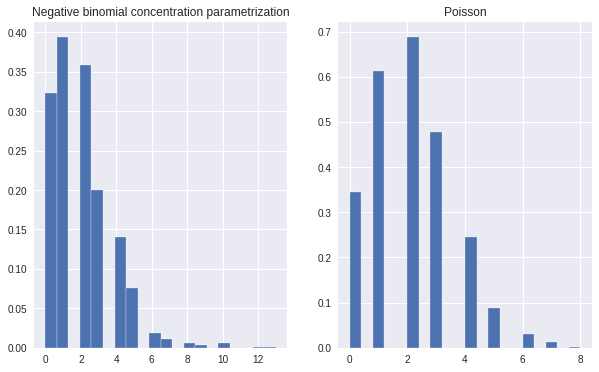

In [17]:
alpha = 4
beta = 2
iters = 1000
data = dict(alpha=alpha, beta=beta)
sim = model.sampling(data=data, algorithm="Fixed_param", iter=iters, warmup=0, chains=1)
params = sim.extract()
nbin = params['nbin']
poisson = params['poisson']

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1 = axes[0]
ax1.hist(nbin, edgecolor='white', density=True, bins=20)
ax1.set_title(r'Negative binomial concentration parametrization')

ax2 = axes[1]
ax2.hist(poisson, edgecolor='white', density=True, bins=20)
ax2.set_title('Poisson')

plt.show()

### a) Negative binomial distribution - dispersion parametrization
Below code shows stan file that generates negative binomial with dispersion parametrization and poisson distributed numbers with given parameters (mu and phi). Then stan file is being compiled to C++ code for further use. Then 2 plots are shown to compare both distributions.

In [18]:
with open('nbin2.stan', 'r') as file:
    print(file.read())

data {
    real mu;
    real phi;
}

generated quantities {
    real nbin2 = neg_binomial_2_rng (mu, phi);
    real poisson2 = poisson_rng(mu);
}


In [19]:
model = stan_utility.compile_model('nbin2.stan')

Using cached StanModel


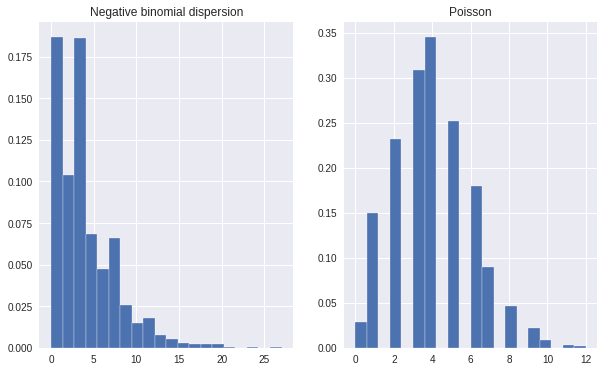

In [20]:
mu = 4
phi = 2
iters = 1000
data = dict(mu=mu, phi=phi)
sim = model.sampling(data=data, algorithm="Fixed_param", iter=iters, warmup=0, chains=1)
params = sim.extract()
nbin = params['nbin2']
poisson = params['poisson2']

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1 = axes[0]
ax1.hist(nbin, edgecolor='white',density=True, bins=20)
ax1.set_title('Negative binomial dispersion')

ax2=axes[1]
ax2.hist(poisson, edgecolor='white', density=True, bins=20)
ax2.set_title('Poisson')

plt.show()

# Task 3
### a) Student-t family of distributions - histograms for different values of degrees of freedom and dispersion parametrization
Below code shows stan file that generates Student-t distributed numbers with given parameters (mu and sigma) and given degrees of freedom. Then stan file is being compiled to C++ code for further use. Then plots are shown to compare distributions.

In [21]:
with open('student_t.stan', 'r') as file:
    print(file.read())

data {
  real freedom;
  real mu;
  real sigma;
}

generated quantities {
    real y = student_t_rng(freedom, mu,sigma);
}


In [22]:
model = stan_utility.compile_model('student_t.stan')

Using cached StanModel


## Degrees of freedom equal to 1 - Cauchy Distribution
Below histograms look to be very narrow and steep.

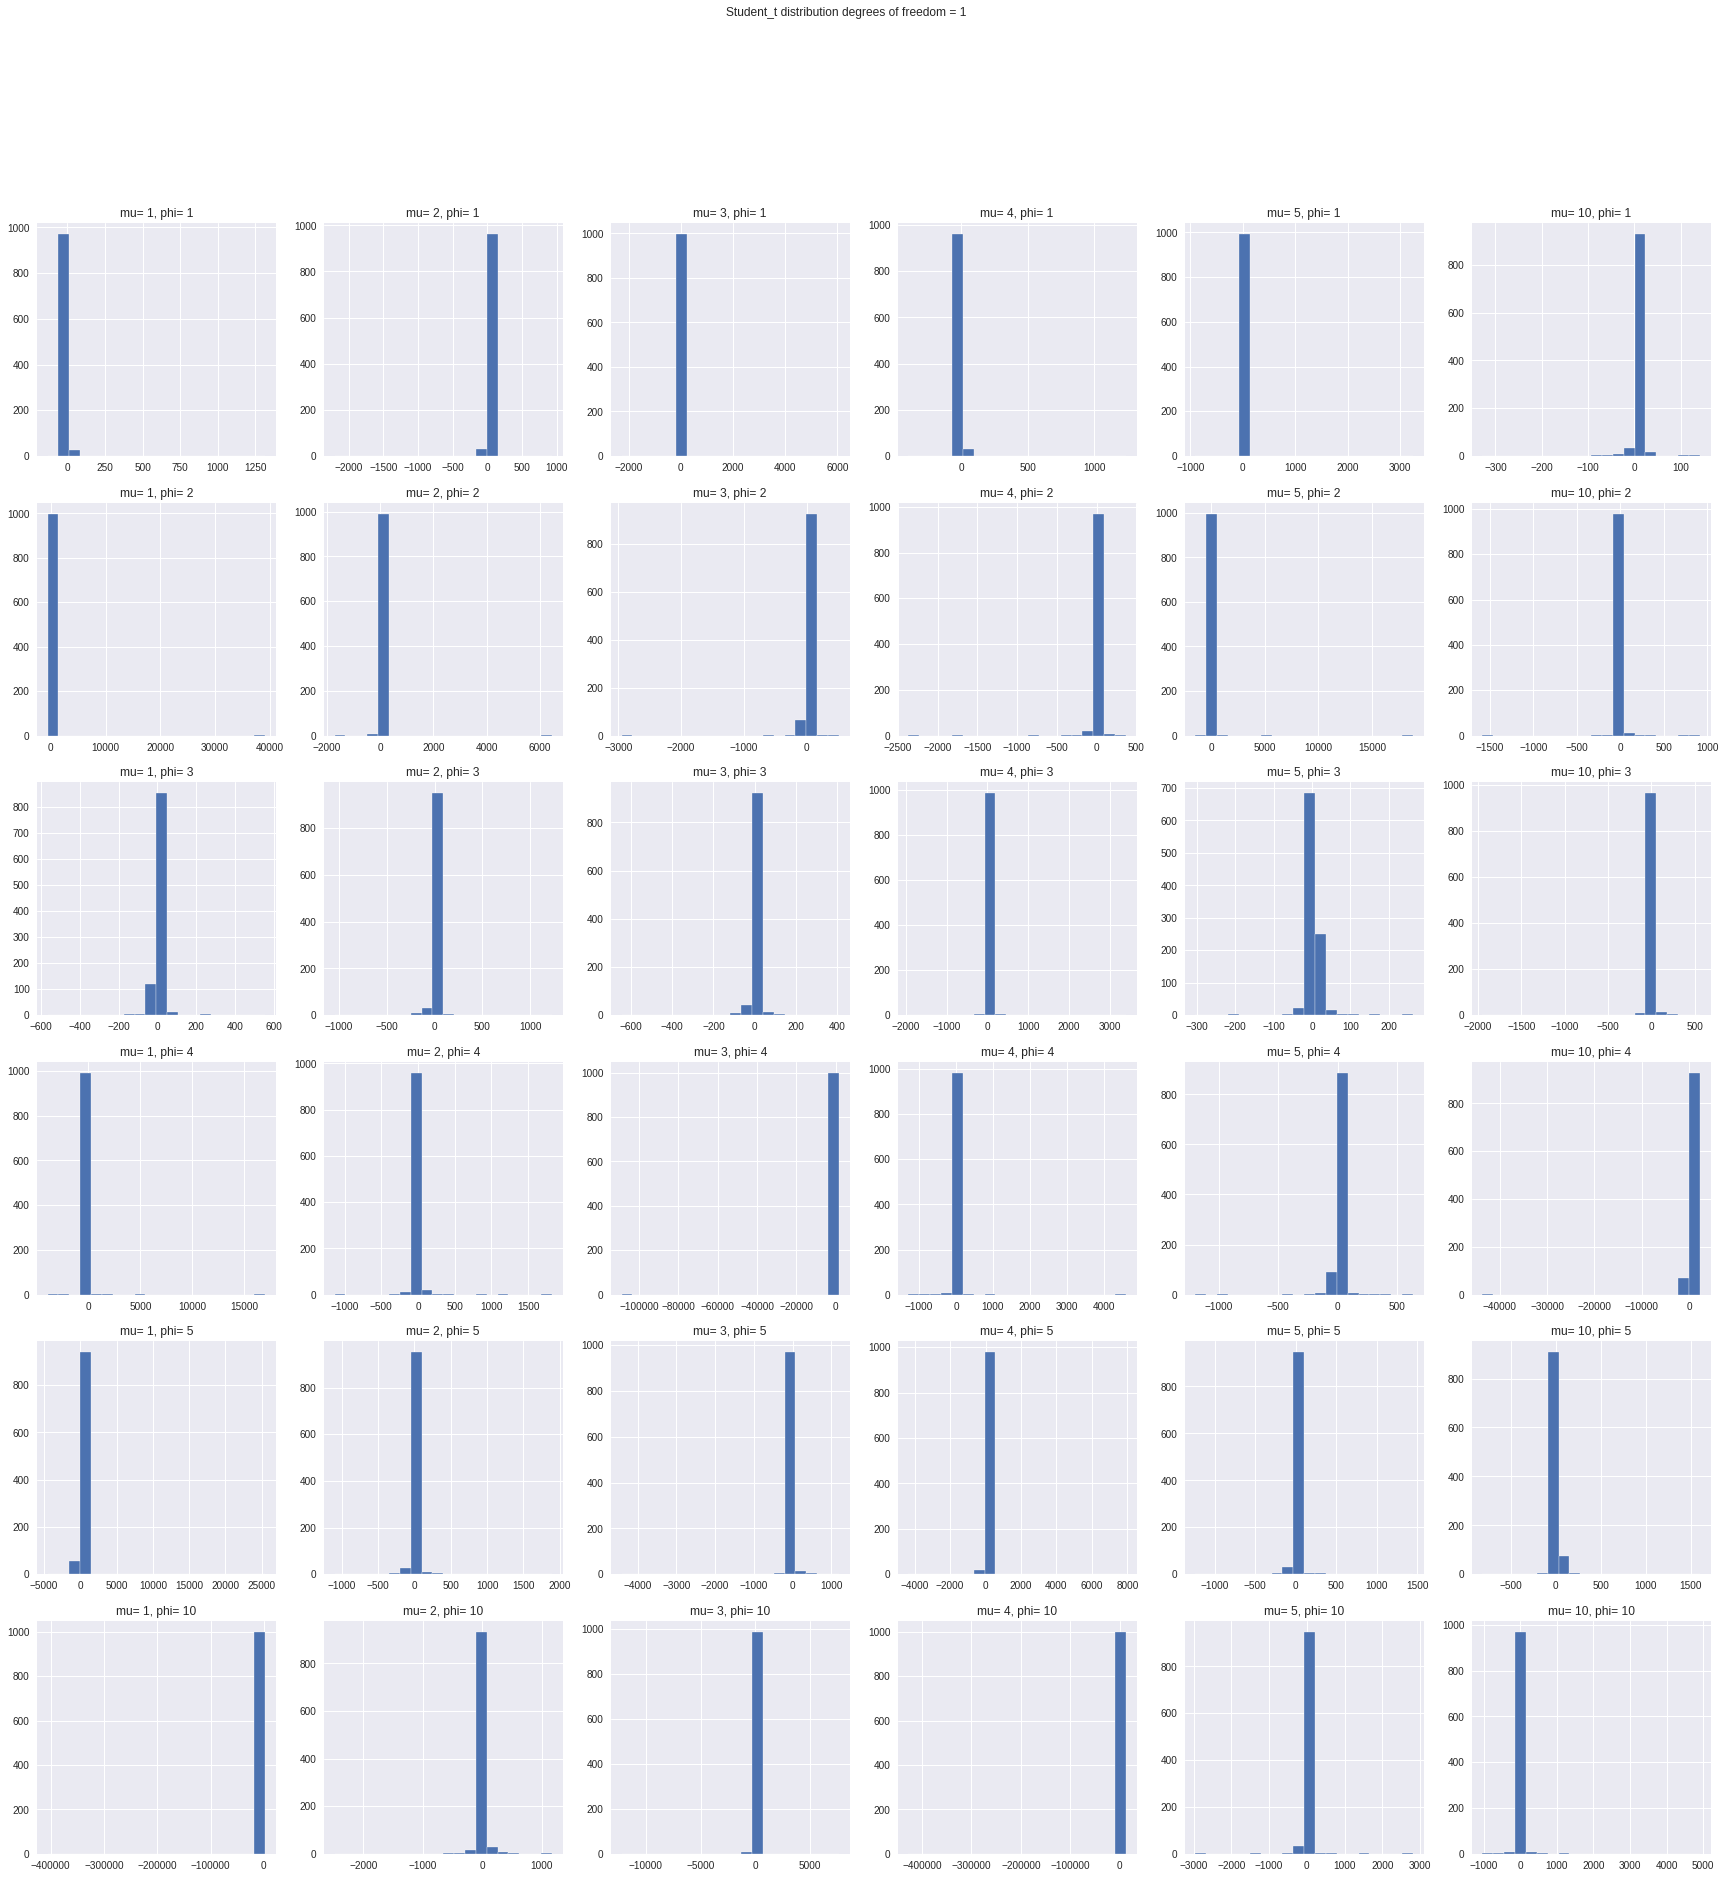

In [23]:
iters = 1000
freedom = 1
sigma_list = [1, 2, 3, 4, 5, 10]
mu_list=[1, 2, 3, 4, 5, 10]

y = []
for sigma in sigma_list:
    for mu in mu_list:
        data = dict(freedom=freedom, mu=mu, sigma=sigma)
        sim = model.sampling(data=data,
                             algorithm="Fixed_param", 
                             iter=iters, 
                             warmup=0, 
                             chains=1)
        y.append(sim.extract()['y'])

fig, axes = plt.subplots(len(sigma_list), len(mu_list), figsize=(30,30))

fig.suptitle('Student_t distribution degrees of freedom = 1')
for i, sigma in enumerate(sigma_list):
    for j, mu in enumerate(mu_list):
        ax = axes[i][j]
        ax.hist(y[i*len(mu_list)+j], bins=20, edgecolor='white')
        ax.set_title('mu= {}, phi= {}'.format(mu, sigma))


plt.show()

## Degrees of freedom equal to 3
After increasing degrees of freedom, values started to spread a bit more.

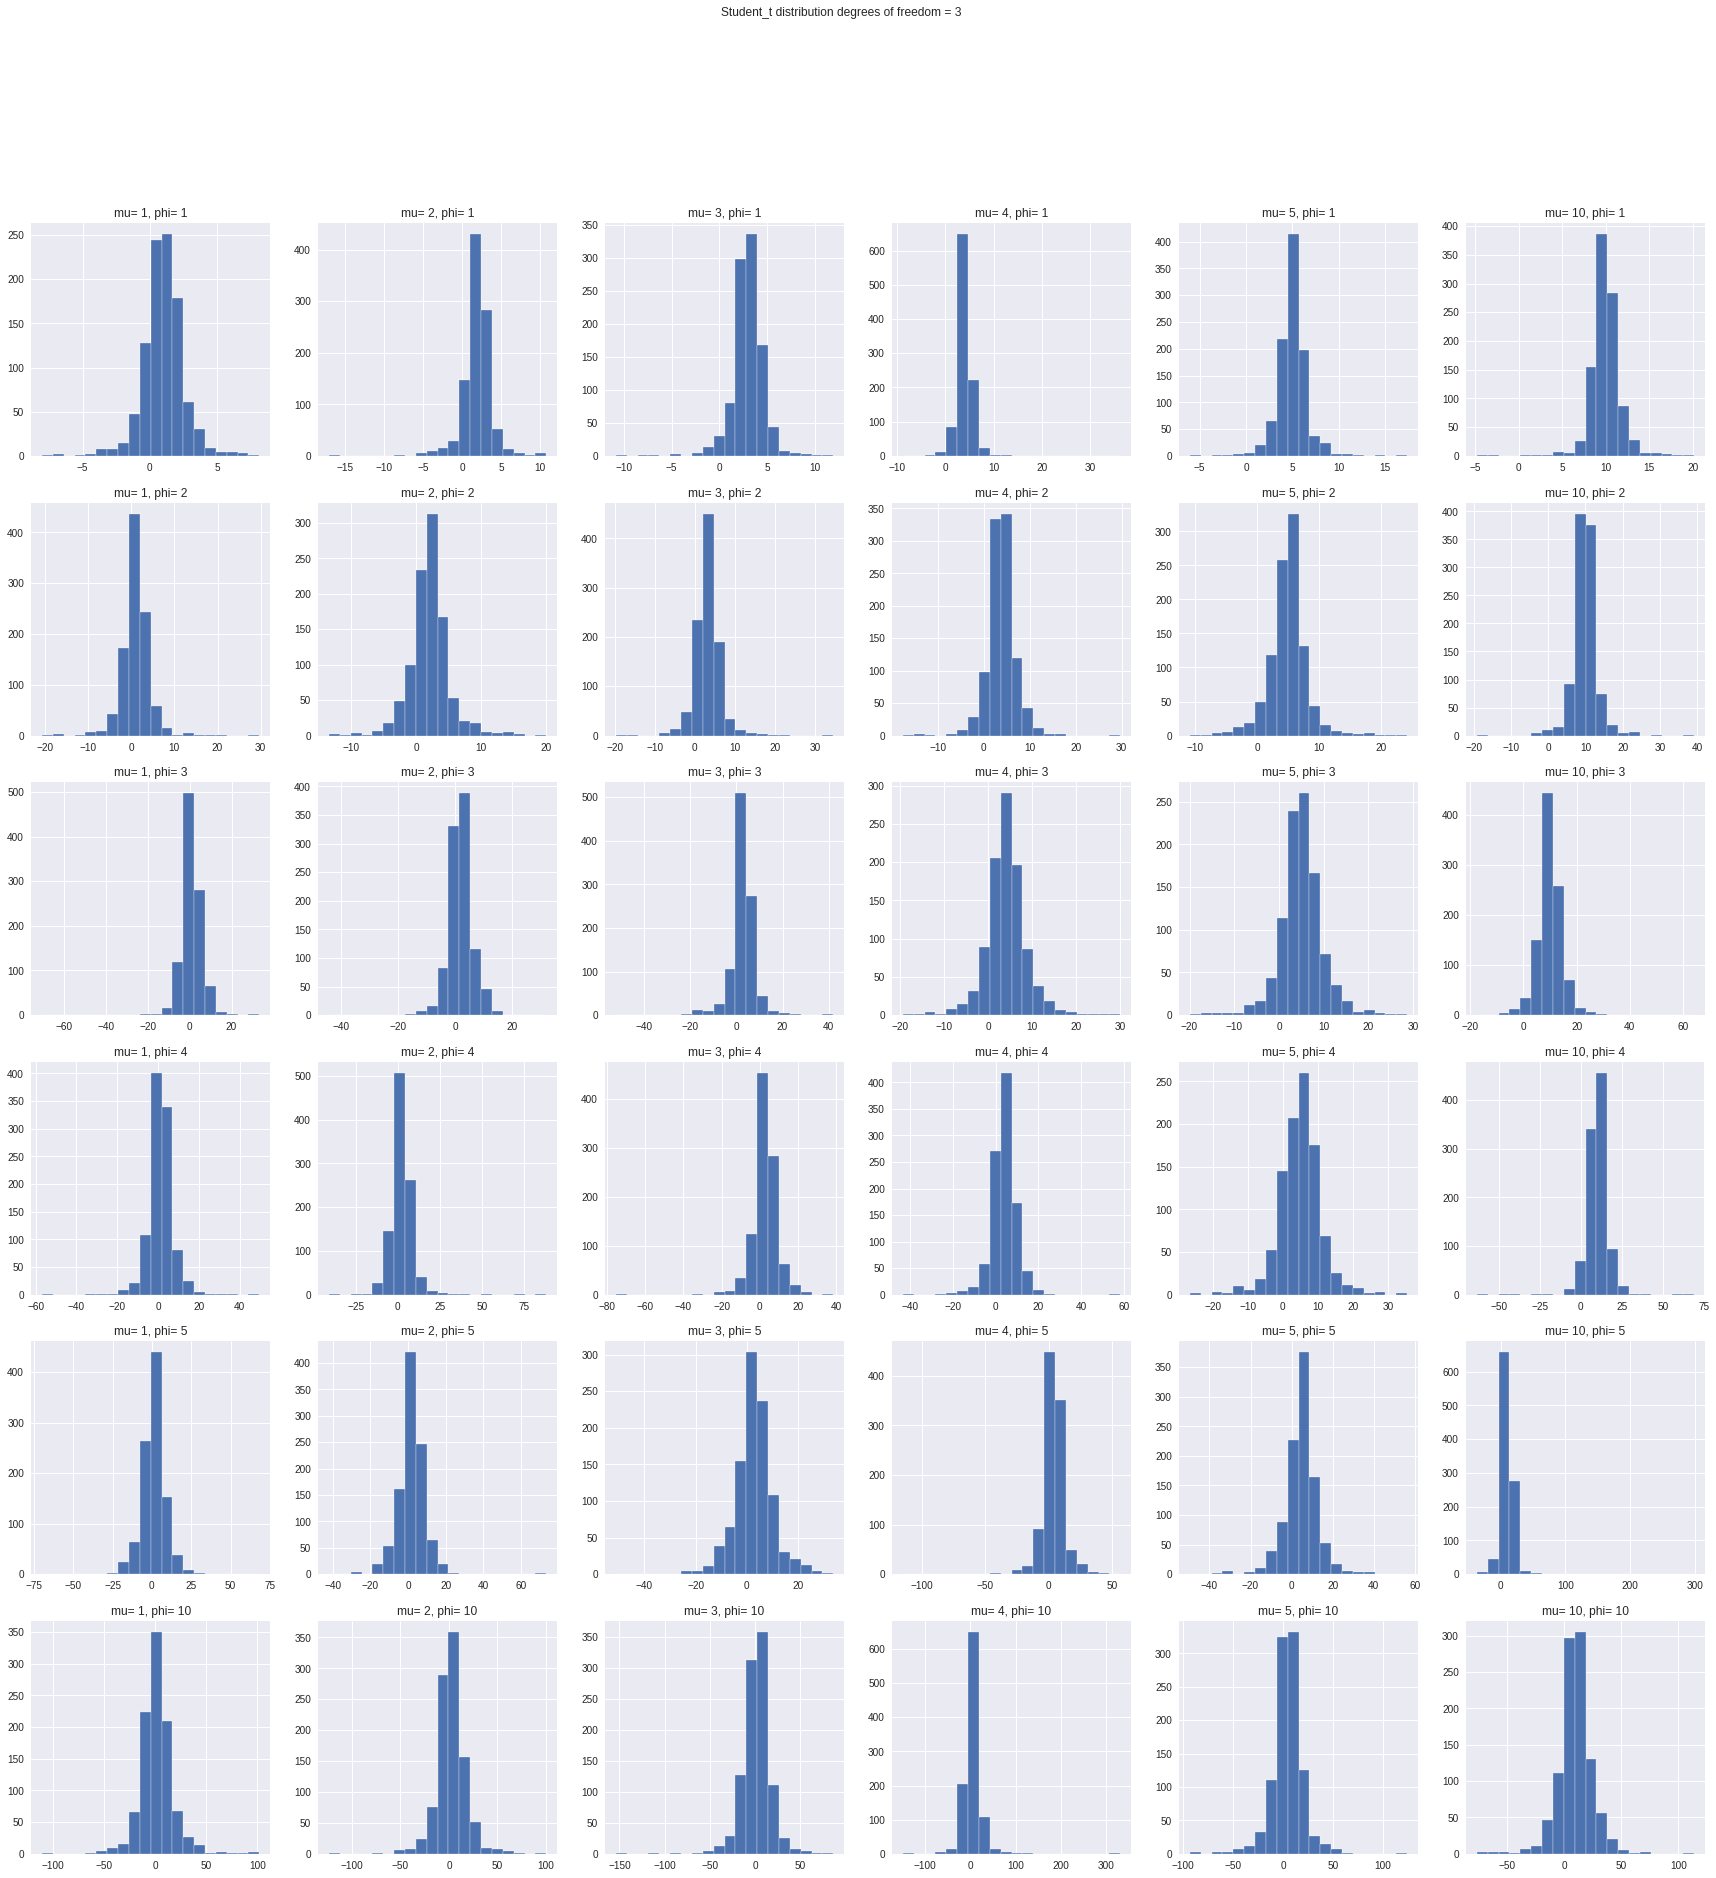

In [24]:
iters = 1000
freedom = 3
sigma_list = [1, 2, 3, 4, 5, 10]
mu_list=[1, 2, 3, 4, 5, 10]

y = []
for sigma in sigma_list:
    for mu in mu_list:
        data = dict(freedom=freedom, mu=mu, sigma=sigma)
        sim = model.sampling(data=data,
                             algorithm="Fixed_param", 
                             iter=iters, 
                             warmup=0, 
                             chains=1)
        y.append(sim.extract()['y'])

fig, axes = plt.subplots(len(sigma_list), len(mu_list), figsize=(30,30))

fig.suptitle('Student_t distribution degrees of freedom = 3')
for i, sigma in enumerate(sigma_list):
    for j, mu in enumerate(mu_list):
        ax = axes[i][j]
        ax.hist(y[i*len(mu_list)+j], bins=20, edgecolor='white')
        ax.set_title('mu= {}, phi= {}'.format(mu, sigma))


plt.show()

## Degrees of freedom equal to 10
In this case trend continues. Mu parameter is responsiple for the location of the histogram center, and phi also makes it more spread.

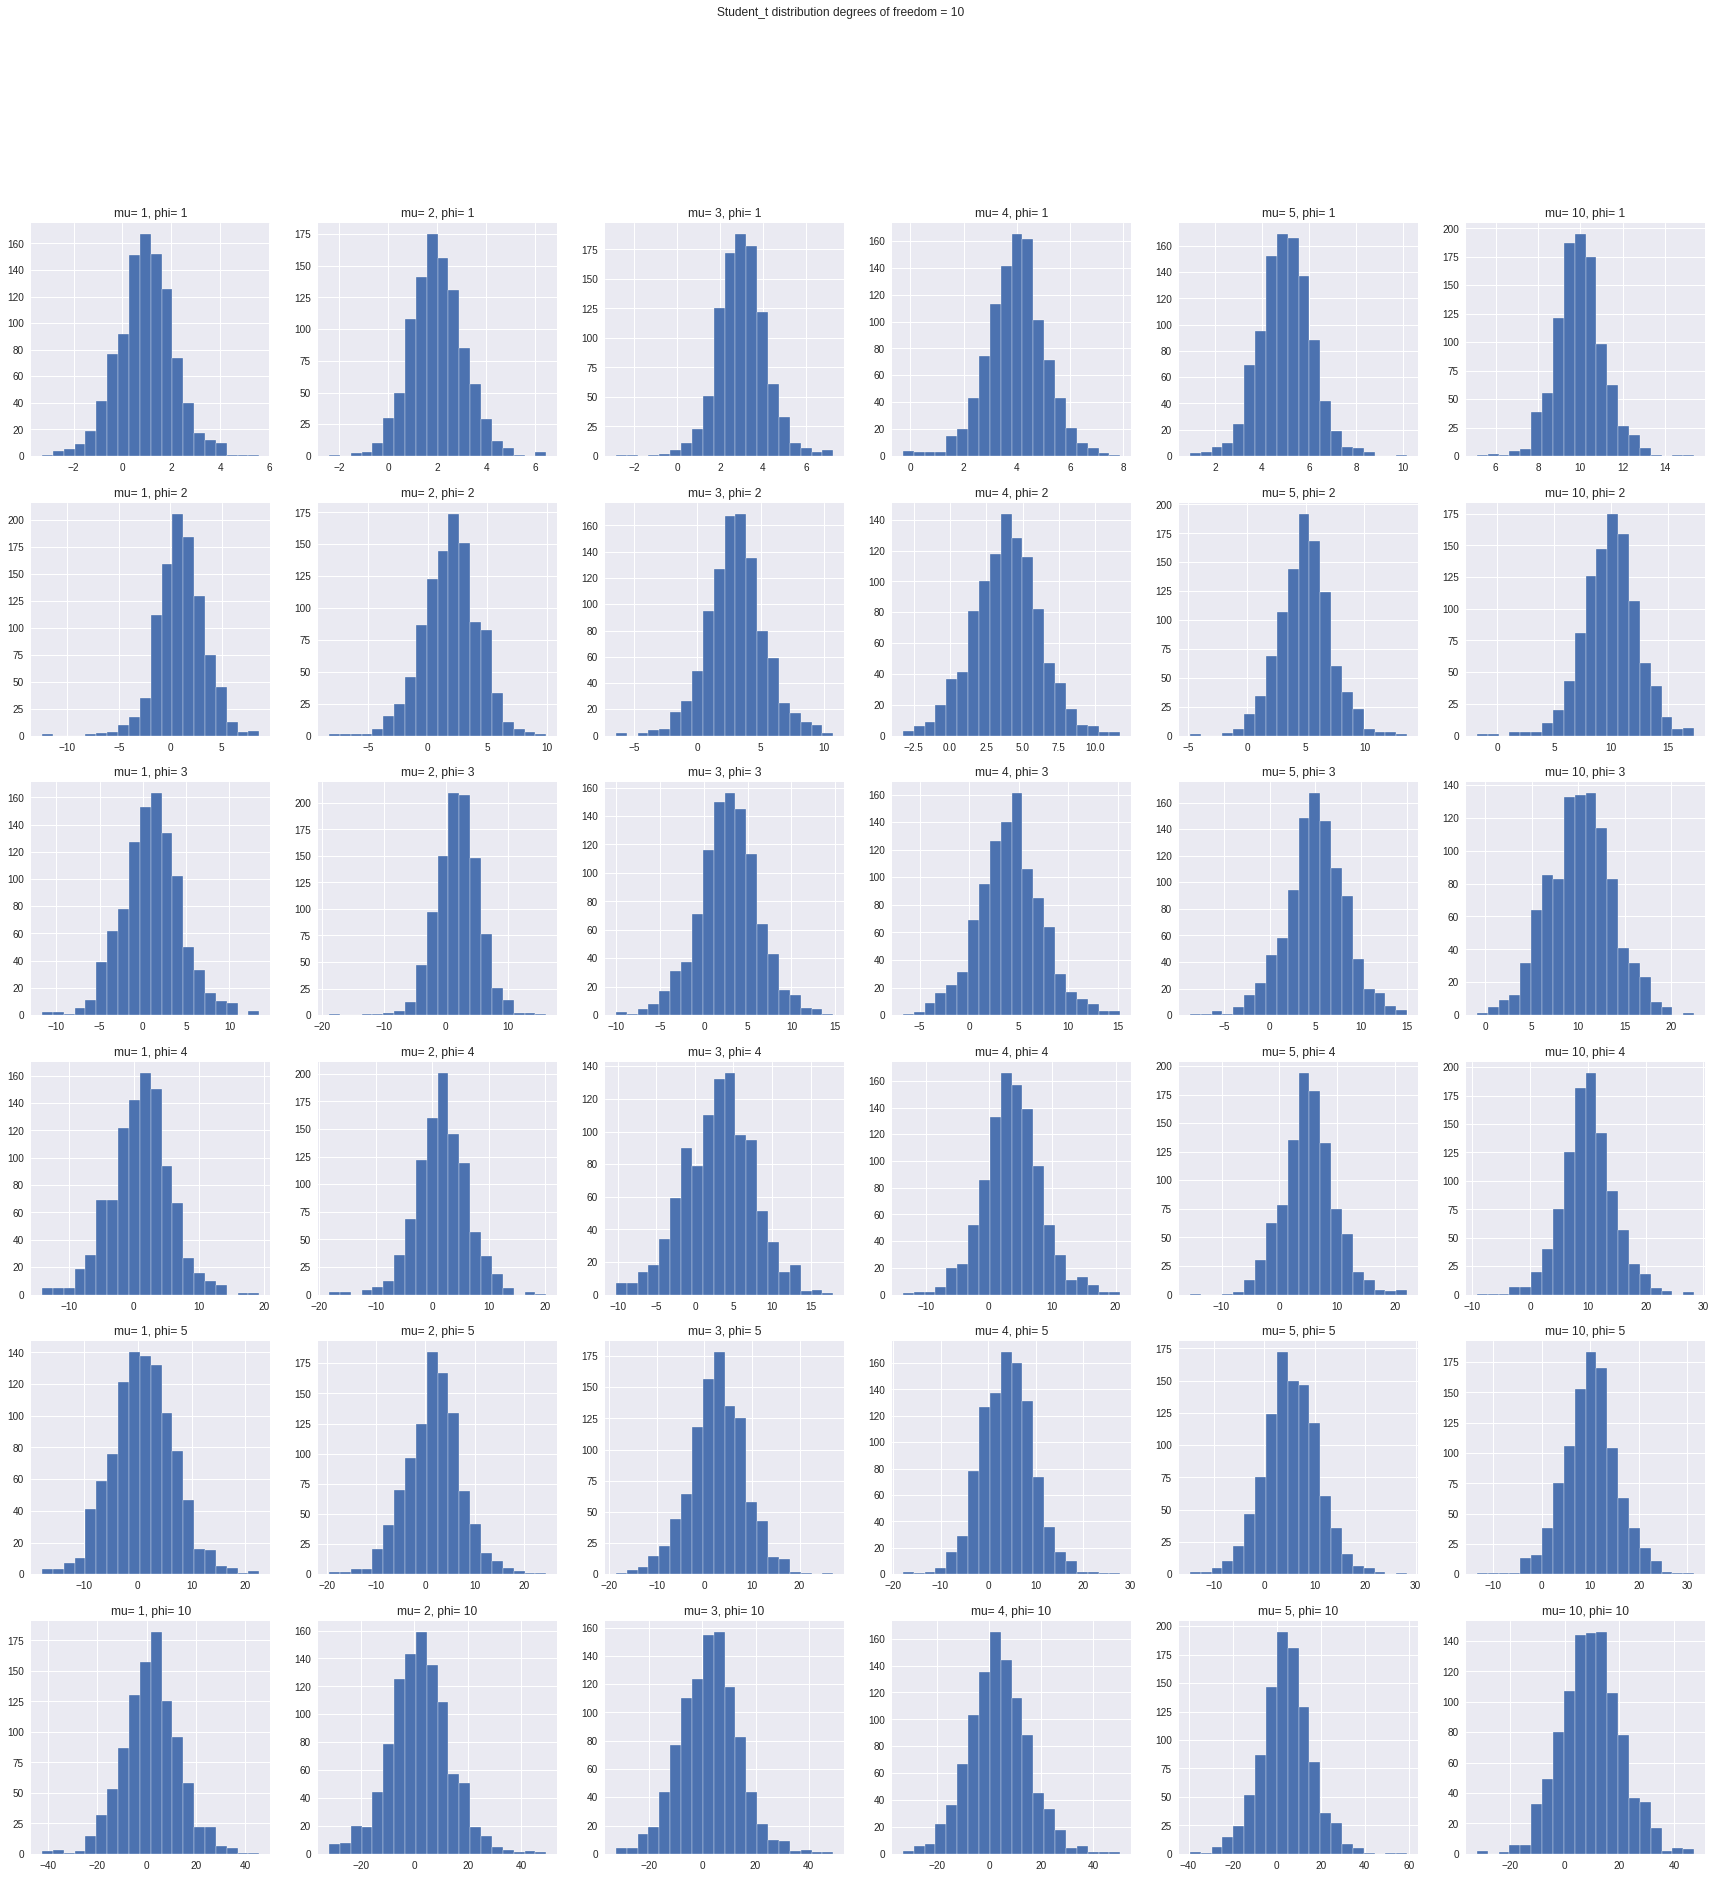

In [25]:
iters = 1000
freedom = 10
sigma_list = [1, 2, 3, 4, 5, 10]
mu_list=[1, 2, 3, 4, 5, 10]

y = []
for sigma in sigma_list:
    for mu in mu_list:
        data = dict(freedom=freedom, mu=mu, sigma=sigma)
        sim = model.sampling(data=data,
                             algorithm="Fixed_param", 
                             iter=iters, 
                             warmup=0, 
                             chains=1)
        y.append(sim.extract()['y'])

fig, axes = plt.subplots(len(sigma_list), len(mu_list), figsize=(30,30))

fig.suptitle('Student_t distribution degrees of freedom = 10')
for i, sigma in enumerate(sigma_list):
    for j, mu in enumerate(mu_list):
        ax = axes[i][j]
        ax.hist(y[i*len(mu_list)+j], bins=20, edgecolor='white')
        ax.set_title('mu= {}, phi= {}'.format(mu, sigma))


plt.show()

### b) Mean and variance depending on number of samples

In [26]:
samples = [10, 20, 100, 500, 1000]
for sample_num in samples:
    data = dict(freedom=1, mu=0, sigma=1)
    sim = model.sampling(data=data,
                         algorithm="Fixed_param", 
                         iter=sample_num, 
                         warmup=0, 
                         chains=1)
    y = sim.extract()['y']
    print("For {} samples, Mean = {}, variance = {}".format(sample_num, np.mean(y), np.var(y)))

For 10 samples, Mean = 0.19830657671232027, variance = 2.982050328602751
For 20 samples, Mean = -2.3252083913843586, variance = 143.7883354668673
For 100 samples, Mean = 0.8133420492018607, variance = 84.69573617669921
For 500 samples, Mean = -2.0756038612388847, variance = 1885.0786827053246
For 1000 samples, Mean = -1.4175477872710327, variance = 1968.7805658787133


# Task 3 - Multivariate normal distributions
### a) 2D case
Below code shows stan file that generates normal distributed numbers in 2D with given parameters (mu and sigma). Then stan file is being compiled to C++ code for further use. Then density plots and 2D histogram are shown.

In [27]:
with open('multi_normal_2d.stan', 'r') as file:
    print(file.read())

data {
  vector[2] mu;
  matrix[2,2] sigma;
}

generated quantities {
    vector[2] y = multi_normal_rng(mu,sigma);
}


In [28]:
model = stan_utility.compile_model('multi_normal_2d.stan')

Using cached StanModel


[[1.        0.4472136]
 [0.4472136 1.       ]]


[]

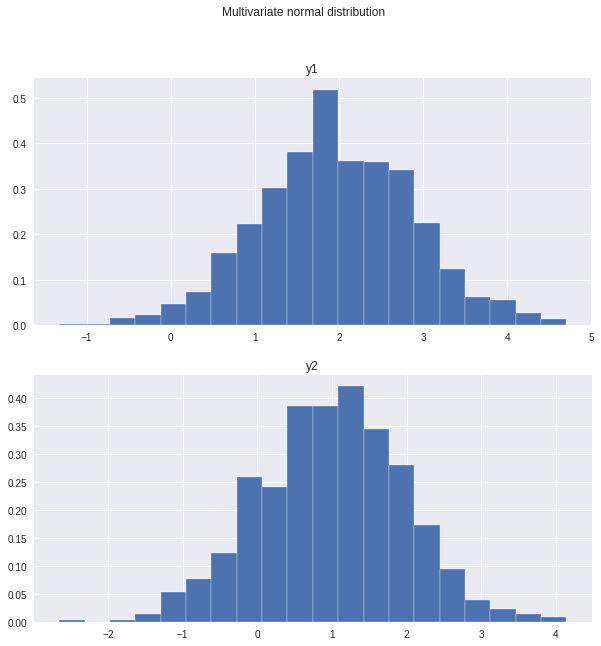

In [29]:
mu = [2, 1]
sigma = [[4, 2], [2, 5]]

from statsmodels.stats.moment_helpers import cov2corr
corr = cov2corr(sigma)
print(corr)

samples = 1000
data = dict(mu=mu,sigma=corr)
sim = model.sampling(data=data,
                     algorithm="Fixed_param", 
                     iter=samples, 
                     warmup=0, 
                     chains=1)
params = sim.extract()
y = params['y']
y1 = [y[i][0] for i in range(samples)]
y2 = [y[i][1] for i in range(samples)]

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Multivariate normal distribution')
ax0 = axes[0]
ax0.hist(y1, bins=20, edgecolor='white', density=True)
ax0.set_title('y1')

ax1 = axes[1]
ax1.hist(y2, bins=20, edgecolor='white', density=True)
ax1.set_title('y2')

plt.plot()

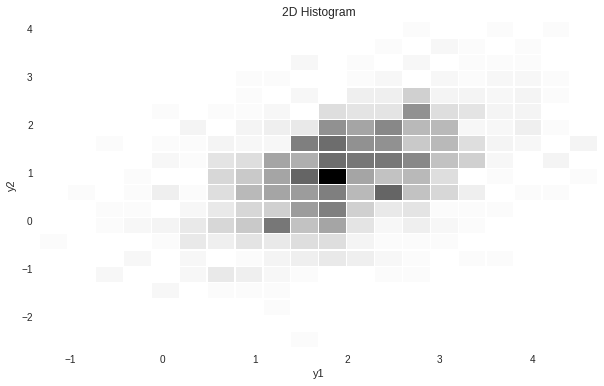

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.hist2d(y1, y2, bins=20, edgecolor='white', density=True)
axes.set_title('2D Histogram')
plt.xlabel('y1')
plt.ylabel('y2')

plt.show()

### b) 3D case
Below code shows stan file that generates normal distributed numbers in 3D with given parameters (mu and sigma). Then stan file is being compiled to C++ code for further use. Then separate 1D histograms for all dimensions are plotted.

In [31]:
with open('multi_normal_3d.stan', 'r') as file:
    print(file.read())

data {
  vector[3] mu;
  matrix[3,3] sigma;
}

generated quantities {
    vector[3] y = multi_normal_rng(mu,sigma);
}


In [32]:
model = stan_utility.compile_model('multi_normal_3d.stan')

Using cached StanModel


[[1.  0.1 0.2]
 [0.1 1.  0.3]
 [0.2 0.3 1. ]]


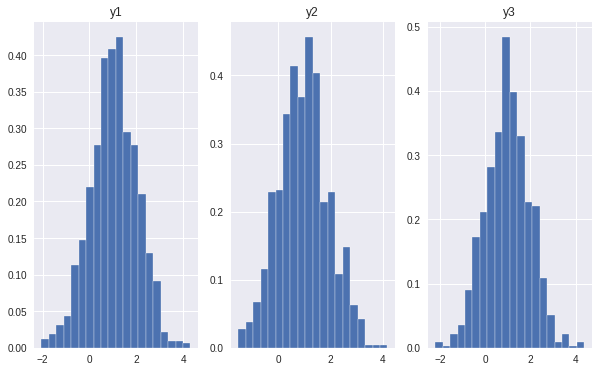

In [33]:
mu = [1, 1, 1]
sigma = [[1, 0.1, 0.2], [0.1, 1, 0.3],[0.2, 0.3, 1]]

corr= cov2corr(sigma)
print(corr)

samples = 1000
data = dict(mu=mu,sigma=corr)
sim = model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=samples, 
                      warmup=0, 
                      chains=1)
params = sim.extract()
y = params['y']
y1 = [y[i][0] for i in range(samples)]
y2 = [y[i][1] for i in range(samples)]
y3 = [y[i][2] for i in range(samples)]

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

ax1 = axes[0]
ax1.hist(y1, bins=20, edgecolor='white', density=True)
ax1.set_title('y1')

ax2 = axes[1]
ax2.hist(y2, bins=20, edgecolor='white', density=True)
ax2.set_title('y2')

ax2 = axes[2]
ax2.hist(y3, bins=20, edgecolor='white', density=True)
ax2.set_title('y3')

plt.show()

### c) 4D case
Below code shows stan file that generates normal distributed numbers in 4D with given parameters (mu and sigma). Then stan file is being compiled to C++ code for further use. Then separate 1D histograms for all dimensions are plotted.

In [34]:
with open('multi_normal_4d.stan', 'r') as file:
    print(file.read())

data {
  vector[4] mu;
  matrix[4,4] sigma;
}

generated quantities {
    vector[4] y = multi_normal_rng(mu,sigma);
}


In [35]:
model = stan_utility.compile_model('multi_normal_4d.stan')

Using cached StanModel


[[1.         0.14142136 0.26457513 0.2       ]
 [0.14142136 1.         0.21380899 0.35355339]
 [0.26457513 0.21380899 1.         0.07559289]
 [0.2        0.35355339 0.07559289 1.        ]]


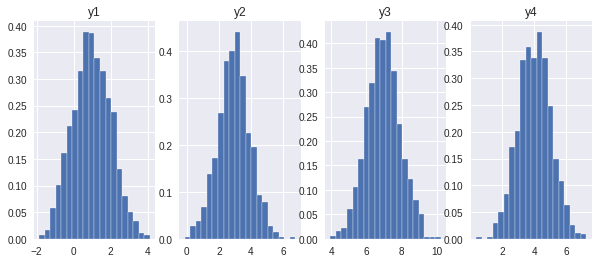

In [36]:
mu = [1, 3, 7, 4]
sigma = [[1, 0.2, 0.7, 0.2], [0.2, 2, 0.8, 0.5],[0.7, 0.8, 7, 0.2], [0.2, 0.5, 0.2, 1]]
corr = cov2corr(sigma)
print(corr)

samples = 1000
data = dict(mu=mu,sigma=corr)
sim = model.sampling(data=data,
                     algorithm="Fixed_param", 
                     iter=samples, 
                     warmup=0, 
                     chains=1)
params = sim.extract()
y = params['y']
y1 = [y[i][0] for i in range(samples)]
y2 = [y[i][1] for i in range(samples)]
y3 = [y[i][2] for i in range(samples)]
y4 = [y[i][3] for i in range(samples)]

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

ax1 = axes[0]
ax1.hist(y1, bins=20, edgecolor='white', density=True)
ax1.set_title('y1')

ax2 = axes[1]
ax2.hist(y2, bins=20, edgecolor='white', density=True)
ax2.set_title('y2')

ax3 = axes[2]
ax3.hist(y3, bins=20, edgecolor='white', density=True)
ax3.set_title('y3')

ax4 = axes[3]
ax4.hist(y4, bins=20, edgecolor='white', density=True)
ax4.set_title('y4')

plt.show()